In [44]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import klib

In [45]:
# importing train.csv
os.chdir(r'D:\DATA\Data Sets\Participants_Data_WSMLC')
df_train = pd.read_csv('train.csv')

df_train.head()

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
0,2009,1,1,0,0,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0
1,2009,1,1,0,30,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0
2,2009,1,1,1,0,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0
3,2009,1,1,1,30,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0
4,2009,1,1,2,0,0,0,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0


## Data Analysis

In [46]:
df_train.isnull().sum()

Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
Clearsky DHI          0
Clearsky DNI          0
Clearsky GHI          0
Cloud Type            0
Dew Point             0
Temperature           0
Pressure              0
Relative Humidity     0
Solar Zenith Angle    0
Precipitable Water    0
Wind Direction        0
Wind Speed            0
Fill Flag             0
dtype: int64

In [47]:
df_train.shape

(175296, 18)

In [48]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175296 entries, 0 to 175295
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                175296 non-null  int64  
 1   Month               175296 non-null  int64  
 2   Day                 175296 non-null  int64  
 3   Hour                175296 non-null  int64  
 4   Minute              175296 non-null  int64  
 5   Clearsky DHI        175296 non-null  int64  
 6   Clearsky DNI        175296 non-null  int64  
 7   Clearsky GHI        175296 non-null  int64  
 8   Cloud Type          175296 non-null  int64  
 9   Dew Point           175296 non-null  float64
 10  Temperature         175296 non-null  float64
 11  Pressure            175296 non-null  int64  
 12  Relative Humidity   175296 non-null  float64
 13  Solar Zenith Angle  175296 non-null  float64
 14  Precipitable Water  175296 non-null  float64
 15  Wind Direction      175296 non-nul

In [49]:
df_train.describe()

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
count,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000
mean,2013.500274,6.523549,15.727820,11.500000,15.000000,53.065426,330.065295,254.365490,2.540474,13.564431,18.266769,1003.185230,79.376366,89.729463,2.903732,188.877796,2.262871,0.740433
std,2.871908,3.448543,8.799349,6.922206,15.000043,64.201407,370.030821,327.705006,3.021879,8.196787,8.943096,5.935749,19.678235,40.085451,1.546979,99.014733,1.281902,6.575655
min,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-17.000000,-9.000000,970.000000,7.190000,8.550000,0.122000,0.000000,0.000000,0.000000
25%,2011.000000,4.000000,8.000000,5.750000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,12.000000,1000.000000,65.590000,56.450000,1.534000,97.400000,1.300000,0.000000
50%,2013.500000,7.000000,16.000000,11.500000,15.000000,0.000000,0.000000,0.000000,1.000000,15.000000,20.000000,1000.000000,84.230000,89.860000,2.866000,200.000000,2.000000,0.000000
75%,2016.000000,10.000000,23.000000,17.250000,30.000000,103.000000,736.000000,535.000000,6.000000,21.000000,25.000000,1010.000000,97.950000,123.060000,4.223000,272.000000,3.000000,0.000000
max,2018.000000,12.000000,31.000000,23.000000,30.000000,565.000000,1040.000000,1063.000000,10.000000,26.900000,40.000000,1024.000000,100.000000,171.550000,7.700000,360.000000,12.900000,100.000000


In [50]:
df_train['Cloud Type'].value_counts() #one hot encoding

0     82788
7     23163
3     16255
1     15698
8     14276
4     11738
6      7902
2      3018
9       457
10        1
Name: Cloud Type, dtype: int64

In [51]:
df_train['Clearsky GHI'].value_counts()

0       88248
12        173
13        162
14        161
16        155
        ...  
1040        1
1041        1
1042        1
1046        1
1044        1
Name: Clearsky GHI, Length: 1053, dtype: int64

In [52]:
df_train['Clearsky DHI'].value_counts()

0      88248
88       854
90       814
84       813
86       802
       ...  
375        1
365        1
378        1
322        1
476        1
Name: Clearsky DHI, Length: 375, dtype: int64

In [53]:
df_train['Clearsky DNI'].value_counts()

0       88255
838       293
834       284
804       283
807       280
        ...  
1030        1
1021        1
1023        1
1016        1
1031        1
Name: Clearsky DNI, Length: 1032, dtype: int64

In [54]:
# Removing outliers
from scipy import stats
df_train = df_train[(np.abs(stats.zscore(df_train)) < 3).all(axis=1)]
df_train.shape

(170575, 18)

In [55]:
a = df_train.pivot_table(values='Clearsky DHI', columns='Cloud Type', aggfunc=(lambda x: x.mean()))
a

Cloud Type,0,1,2,3,4,6,7,8,9,10
Clearsky DHI,51.300167,30.599871,121.596503,65.419691,47.630299,67.624882,39.699251,59.178654,77.108753,0.0


In [56]:
miss_bool1 = df_train['Clearsky DHI']==0
df_train.loc[miss_bool1, 'Clearsky DHI'] = df_train.loc[miss_bool1, 'Cloud Type'].apply(lambda x: a[x])

In [57]:
b = df_train.pivot_table(values='Clearsky DNI', columns='Cloud Type', aggfunc=(lambda x: x.mean()))
b

Cloud Type,0,1,2,3,4,6,7,8,9,10
Clearsky DNI,358.819113,186.948103,750.446154,379.446323,280.888303,329.591075,225.137858,324.748772,304.06366,0.0


In [58]:
miss_bool2 = df_train['Clearsky DNI']==0
df_train.loc[miss_bool2, 'Clearsky DNI'] = df_train.loc[miss_bool2, 'Cloud Type'].apply(lambda x: b[x])

In [59]:
c = df_train.pivot_table(values='Clearsky GHI', columns='Cloud Type', aggfunc=(lambda x: x.mean()))
c

Cloud Type,0,1,2,3,4,6,7,8,9,10
Clearsky GHI,269.1794,140.133891,658.084615,304.254624,204.821052,273.871264,174.141896,257.032785,277.082228,0.0


In [60]:
miss_bool3 = df_train['Clearsky GHI']==0
df_train.loc[miss_bool3, 'Clearsky GHI'] = df_train.loc[miss_bool3, 'Cloud Type'].apply(lambda x: c[x])

In [61]:
df_train['Clearsky DHI'].value_counts()

51.300167     39760
39.699251     14099
30.599871     10533
59.178654      6751
65.419691      6696
              ...  
244.000000       26
234.000000       24
1.000000         23
239.000000       17
0.000000          1
Name: Clearsky DHI, Length: 255, dtype: int64

In [62]:
df_train['Clearsky DNI'].value_counts()

358.819113     39761
225.137858     14102
186.948103     10533
324.748772      6751
379.446323      6696
               ...  
0.000000           1
1023.000000        1
1016.000000        1
1031.000000        1
1015.000000        1
Name: Clearsky DNI, Length: 1041, dtype: int64

In [63]:
df_train['Clearsky GHI'].value_counts()

269.179400     39760
174.141896     14099
140.133891     10533
257.032785      6751
304.254624      6696
               ...  
1054.000000        1
1056.000000        1
1042.000000        1
1044.000000        1
0.000000           1
Name: Clearsky GHI, Length: 1062, dtype: int64

In [64]:
df_train['Clearsky DHI'].isnull().sum(), df_train['Clearsky DNI'].isnull().sum(), df_train['Clearsky GHI'].isnull().sum()

(0, 0, 0)

<AxesSubplot:ylabel='Clearsky DHI'>

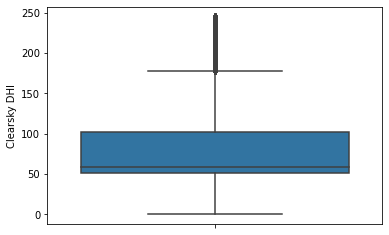

In [65]:
sns.boxplot(y = df_train['Clearsky DHI']) # remove outliers

<AxesSubplot:ylabel='Clearsky DNI'>

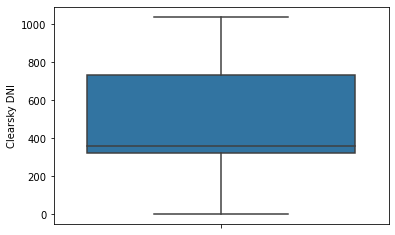

In [66]:
sns.boxplot(y = df_train['Clearsky DNI'])

<AxesSubplot:ylabel='Clearsky GHI'>

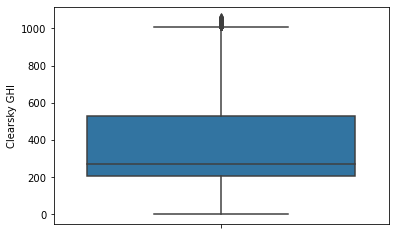

In [67]:
sns.boxplot(y = df_train['Clearsky GHI'])

<AxesSubplot:xlabel='Cloud Type', ylabel='Clearsky DNI'>

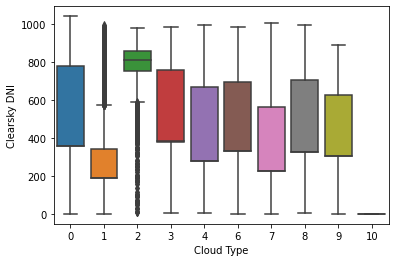

In [68]:
sns.boxplot(x = df_train["Cloud Type"], y = df_train['Clearsky DNI'])

<AxesSubplot:xlabel='Cloud Type', ylabel='Clearsky GHI'>

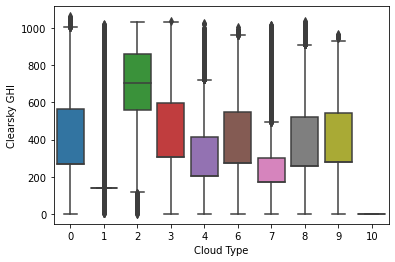

In [69]:
sns.boxplot(x = df_train["Cloud Type"], y = df_train['Clearsky GHI'])

<AxesSubplot:xlabel='Cloud Type', ylabel='Clearsky DHI'>

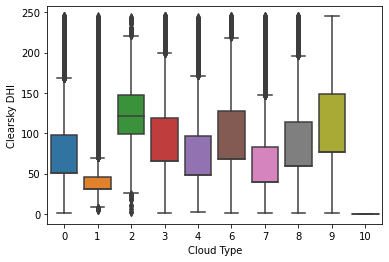

In [70]:
sns.boxplot(x = df_train["Cloud Type"], y = df_train['Clearsky DHI'])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Clearsky DHI', ylabel='Density'>

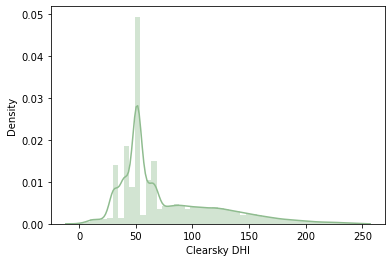

In [71]:
sns.distplot(df_train['Clearsky DHI'], color='darkseagreen') # right skewed

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Clearsky GHI', ylabel='Density'>

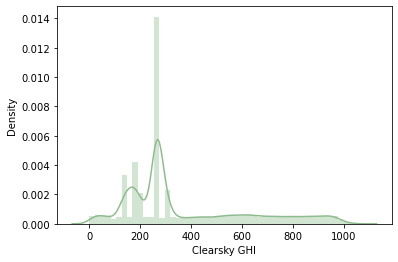

In [72]:
sns.distplot(df_train['Clearsky GHI'], color='darkseagreen')

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Clearsky DNI', ylabel='Density'>

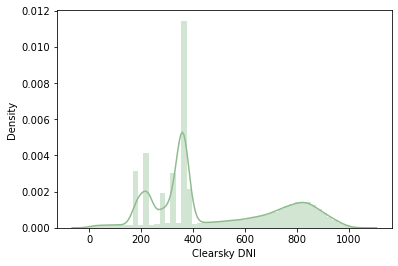

In [73]:
sns.distplot(df_train['Clearsky DNI'], color='darkseagreen')

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cloud Type', ylabel='count'>

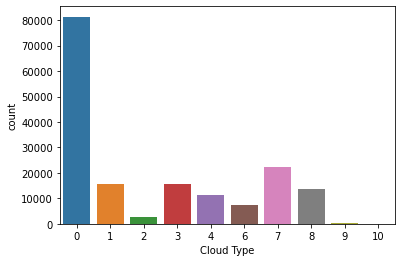

In [74]:
sns.countplot(df_train["Cloud Type"])

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='Fill Flag', ylabel='Density'>

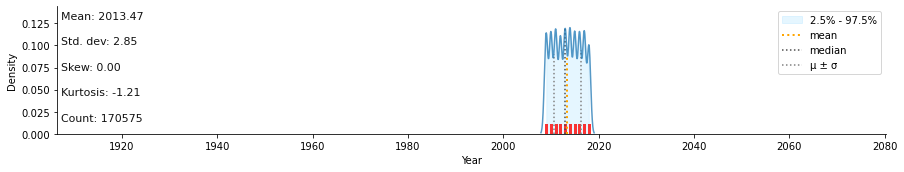

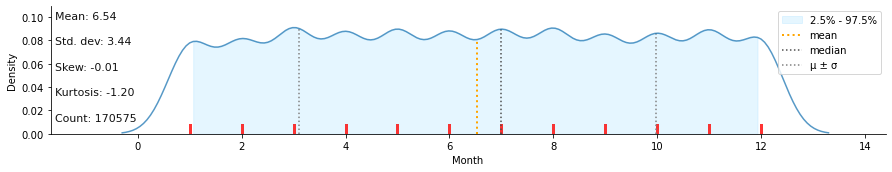

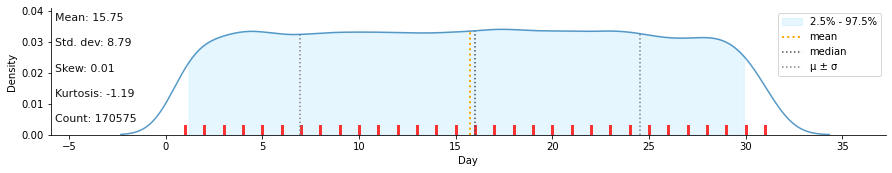

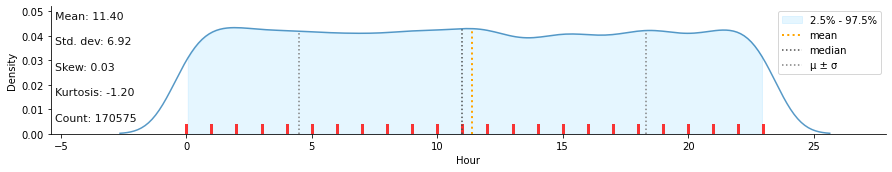

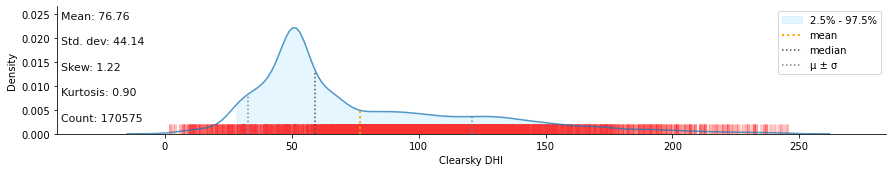

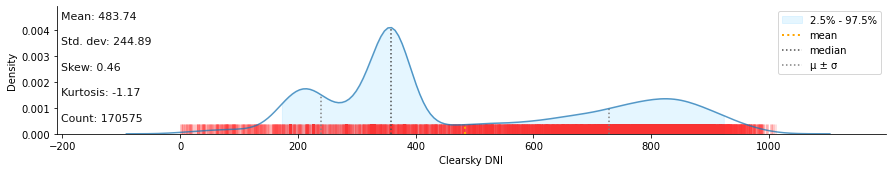

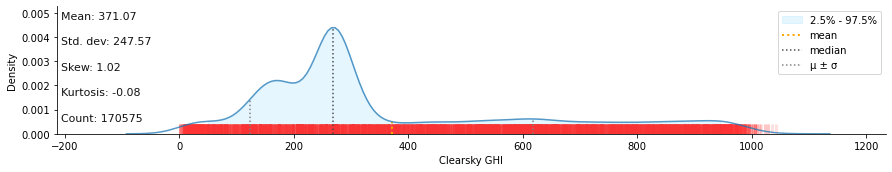

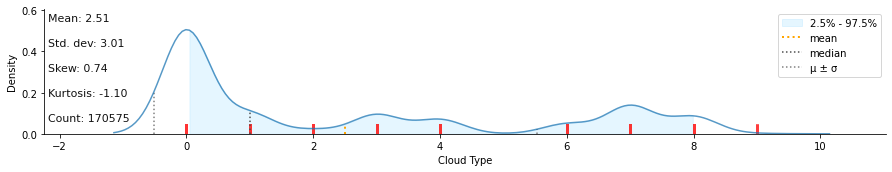

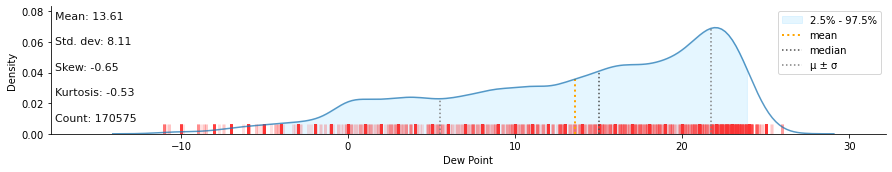

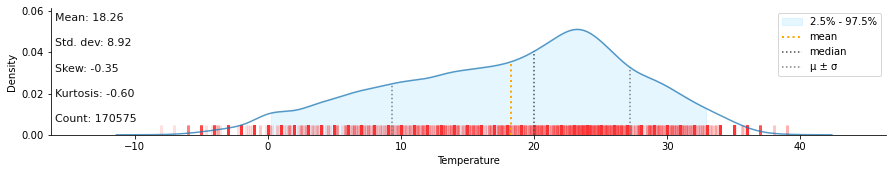

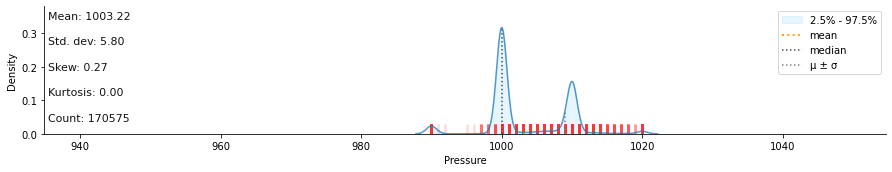

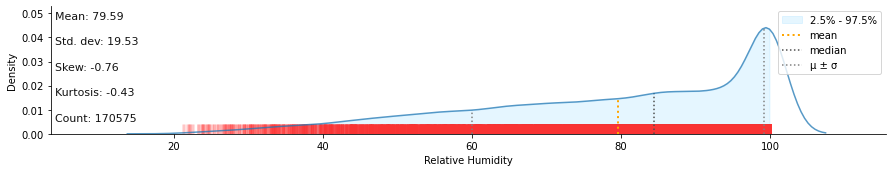

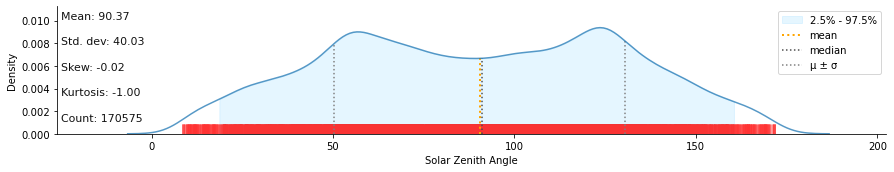

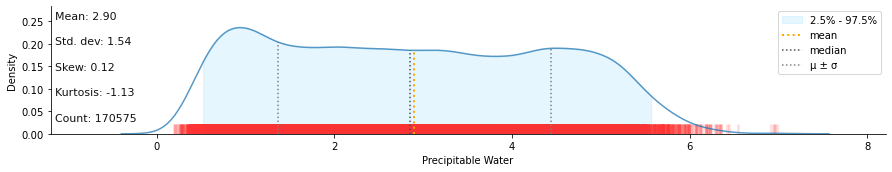

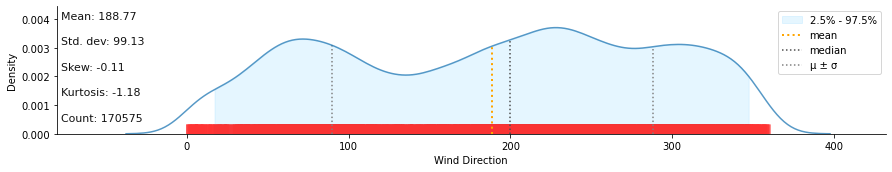

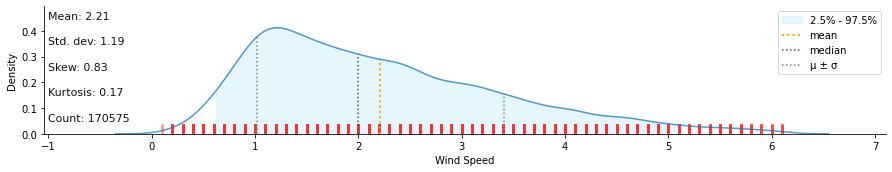

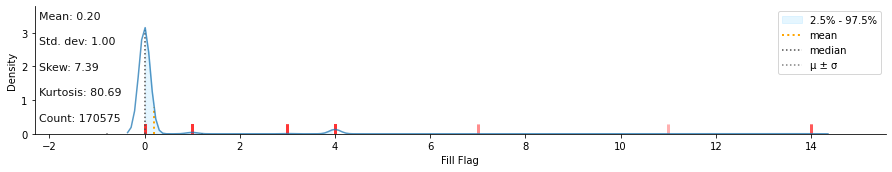

In [75]:
klib.dist_plot(df_train) 

<AxesSubplot:>

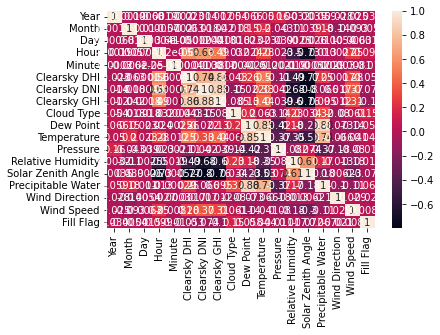

In [76]:
corr = df_train.corr()
sns.heatmap(corr, annot=True)

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

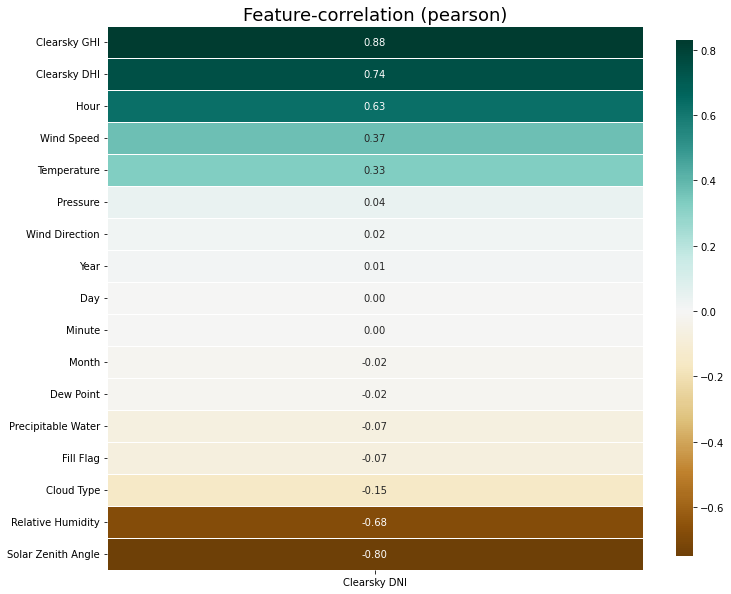

In [77]:
klib.corr_plot(df_train, target='Clearsky DNI')

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

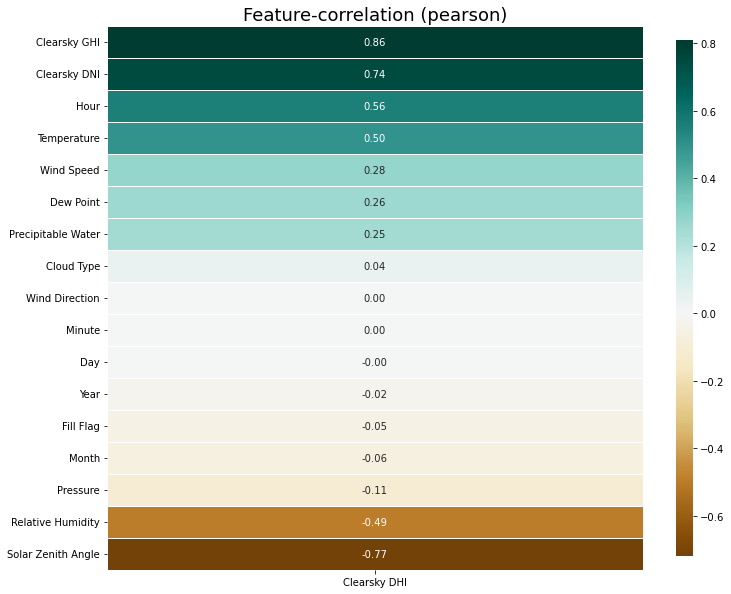

In [78]:
klib.corr_plot(df_train, target='Clearsky DHI')

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

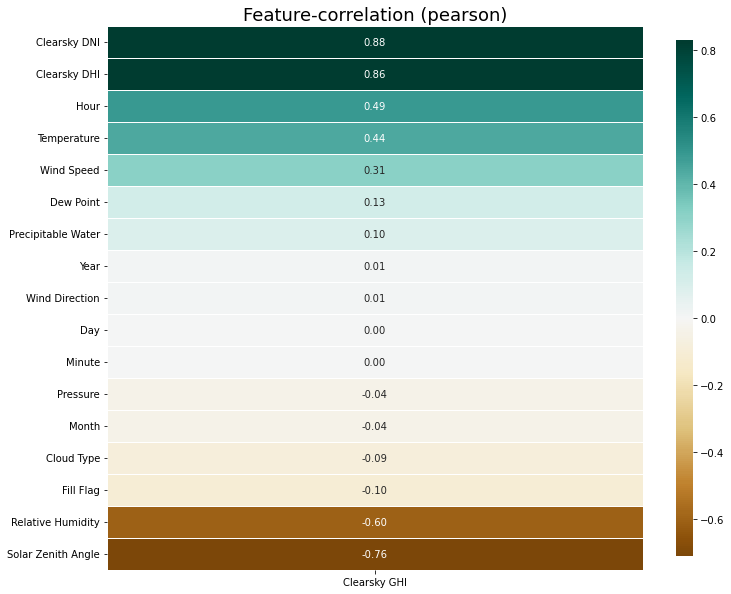

In [79]:
klib.corr_plot(df_train, target='Clearsky GHI')

## Splitting Dependent and Independent Variables

In [114]:
X_train = df_train.drop(['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI'], axis=1)
y = df_train[['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI']]

In [115]:
# encoding 
X_train = pd.get_dummies(X_train, columns = ['Cloud Type'])

In [116]:
# drop Cloud Type_1 and Cloud Type_10 from X_train_std ..because these are not present in test data.

X_train = X_train.drop(['Cloud Type_1' ,"Cloud Type_10"], axis=1)
X_train.shape

(170575, 22)

In [117]:
# Scaling 
X_train_copy = X_train.copy(deep=True)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)
X_train_std = pd.DataFrame(X_train_std,columns = X_train_copy.columns)

In [118]:
X_train_std.head()

,Year,Month,Day,Hour,Minute,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,...,Wind Speed,Fill Flag,Cloud Type_0,Cloud Type_2,Cloud Type_3,Cloud Type_4,Cloud Type_6,Cloud Type_7,Cloud Type_8,Cloud Type_9
0,-1.566981,-1.611592,-1.676838,-1.647408,-1.000686,-1.678165,-1.486814,1.169447,-0.217463,0.394251,...,0.744237,-0.203011,1.047432,-0.130586,-0.318758,-0.264865,-0.21288,-0.387719,-0.29725,-0.047064
1,-1.566981,-1.611592,-1.676838,-1.647408,0.999314,-1.554829,-1.486814,1.169447,0.062688,0.547373,...,0.744237,-0.203011,1.047432,-0.130586,-0.318758,-0.264865,-0.21288,-0.387719,-0.29725,-0.047064
2,-1.566981,-1.611592,-1.676838,-1.502855,-1.000686,-1.678165,-1.486814,1.169447,-0.067401,0.702743,...,0.827924,-0.203011,-0.954716,-0.130586,-0.318758,3.775504,-0.21288,-0.387719,-0.29725,-0.047064
3,-1.566981,-1.611592,-1.676838,-1.502855,0.999314,-1.678165,-1.598951,1.169447,-0.067401,0.859612,...,0.744237,-0.203011,-0.954716,-0.130586,-0.318758,3.775504,-0.21288,-0.387719,-0.29725,-0.047064
4,-1.566981,-1.611592,-1.676838,-1.358301,-1.000686,-1.678165,-1.598951,1.169447,-0.160614,1.017979,...,0.660550,-0.203011,-0.954716,-0.130586,-0.318758,3.775504,-0.21288,-0.387719,-0.29725,-0.047064


In [119]:
y.head()

,Clearsky DHI,Clearsky DNI,Clearsky GHI
0,51.300167,358.819113,269.179400
1,51.300167,358.819113,269.179400
2,47.630299,280.888303,204.821052
3,47.630299,280.888303,204.821052
4,47.630299,280.888303,204.821052


<AxesSubplot:ylabel='Clearsky DHI'>

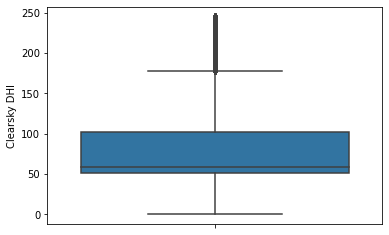

In [120]:
sns.boxplot(y = y['Clearsky DHI'])

<AxesSubplot:ylabel='Clearsky DNI'>

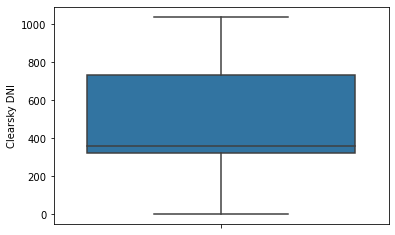

In [121]:
sns.boxplot(y = y['Clearsky DNI'])

<AxesSubplot:ylabel='Clearsky GHI'>

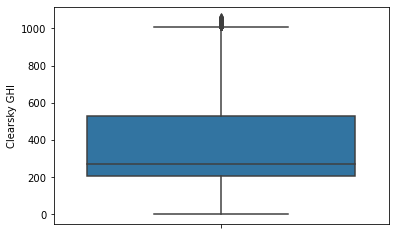

In [122]:
sns.boxplot(y = y['Clearsky GHI']) 

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Clearsky DHI', ylabel='Density'>

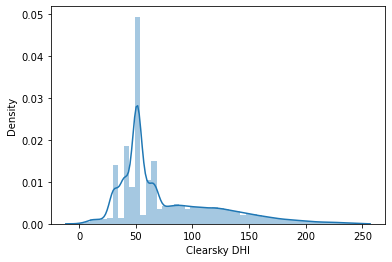

In [123]:
sns.distplot((y['Clearsky DHI']))

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Clearsky DNI', ylabel='Density'>

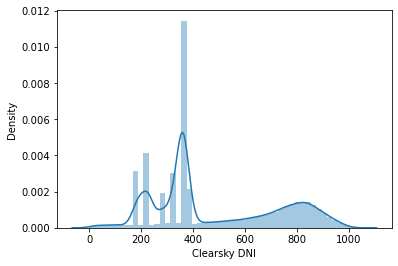

In [124]:
sns.distplot((y['Clearsky DNI']))

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Clearsky GHI', ylabel='Density'>

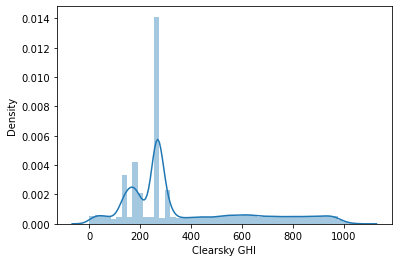

In [125]:
sns.distplot((y['Clearsky GHI']))

In [126]:
y.isnull().sum()

Clearsky DHI    0
Clearsky DNI    0
Clearsky GHI    0
dtype: int64

In [127]:
# importing test.csv

df_test = pd.read_csv("test.csv")
df_test.head()

,Year,Month,Day,Hour,Minute,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,Clearsky DHI,Clearsky DNI,Clearsky GHI
0,2019,1,1,0,0,7,18.4,18.8,1008,97.70,106.23,3.5,190,2.3,0,NaN,NaN,NaN
1,2019,1,1,0,30,3,18.4,18.6,1008,98.92,112.36,3.5,187,2.5,0,NaN,NaN,NaN
2,2019,1,1,1,0,3,18.2,18.5,1008,98.35,118.58,3.5,184,2.8,0,NaN,NaN,NaN
3,2019,1,1,1,30,3,18.2,18.3,1008,99.58,124.86,3.5,185,3.0,0,NaN,NaN,NaN
4,2019,1,1,2,0,0,18.0,18.0,1008,99.71,131.20,3.6,186,3.1,0,NaN,NaN,NaN


## Data Analysis

In [128]:
df_test.isnull().sum()

Year                      0
Month                     0
Day                       0
Hour                      0
Minute                    0
Cloud Type                0
Dew Point                 0
Temperature               0
Pressure                  0
Relative Humidity         0
Solar Zenith Angle        0
Precipitable Water        0
Wind Direction            0
Wind Speed                0
Fill Flag                 0
Clearsky DHI          17520
Clearsky DNI          17520
Clearsky GHI          17520
dtype: int64

In [129]:
df_test.shape

(17520, 18)

In [130]:
df_test = df_test.drop(['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI'], axis=1)
df_test.shape

(17520, 15)

In [131]:
df_test['Cloud Type'].value_counts() #one hot encoding

0    9339
7    4044
3    1629
4     858
6     768
8     661
2     133
9      88
Name: Cloud Type, dtype: int64

In [132]:
df_test.describe()

,Year,Month,Day,Hour,Minute,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
count,17520.0,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000
mean,2019.0,6.526027,15.720548,11.500000,15.000000,2.715811,14.623550,19.929817,1006.751370,75.165104,89.701282,2.989498,184.470491,2.252871,5.148916
std,0.0,3.447950,8.796498,6.922384,15.000428,3.159985,7.273676,9.087679,4.742727,20.121986,40.089410,1.492317,97.672316,1.238956,18.812279
min,2019.0,1.000000,1.000000,0.000000,0.000000,0.000000,-8.700000,-4.800000,988.000000,16.870000,8.570000,0.300000,0.000000,0.100000,0.000000
25%,2019.0,4.000000,8.000000,5.750000,0.000000,0.000000,8.800000,13.000000,1003.000000,59.967500,56.432500,1.800000,92.000000,1.300000,0.000000
50%,2019.0,7.000000,16.000000,11.500000,15.000000,0.000000,16.600000,21.100000,1007.000000,79.235000,89.450000,3.000000,192.000000,2.000000,0.000000
75%,2019.0,10.000000,23.000000,17.250000,30.000000,7.000000,20.400000,26.400000,1010.000000,92.872500,123.040000,4.100000,265.000000,3.000000,0.000000
max,2019.0,12.000000,31.000000,23.000000,30.000000,9.000000,25.700000,38.700000,1023.000000,100.000000,171.540000,6.800000,360.000000,8.200000,100.000000


In [133]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                17520 non-null  int64  
 1   Month               17520 non-null  int64  
 2   Day                 17520 non-null  int64  
 3   Hour                17520 non-null  int64  
 4   Minute              17520 non-null  int64  
 5   Cloud Type          17520 non-null  int64  
 6   Dew Point           17520 non-null  float64
 7   Temperature         17520 non-null  float64
 8   Pressure            17520 non-null  int64  
 9   Relative Humidity   17520 non-null  float64
 10  Solar Zenith Angle  17520 non-null  float64
 11  Precipitable Water  17520 non-null  float64
 12  Wind Direction      17520 non-null  int64  
 13  Wind Speed          17520 non-null  float64
 14  Fill Flag           17520 non-null  int64  
dtypes: float64(6), int64(9)
memory usage: 2.0 MB


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cloud Type', ylabel='count'>

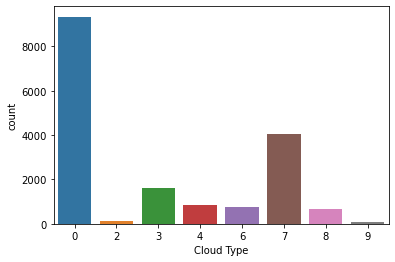

In [134]:
sns.countplot(df_test["Cloud Type"])

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cloud Type', ylabel='count'>

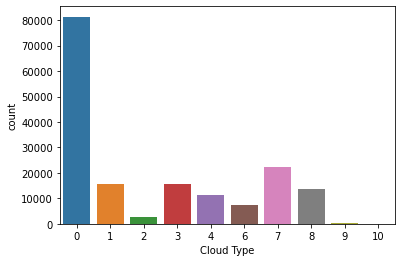

In [135]:
sns.countplot(df_train["Cloud Type"])

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='Fill Flag', ylabel='Density'>

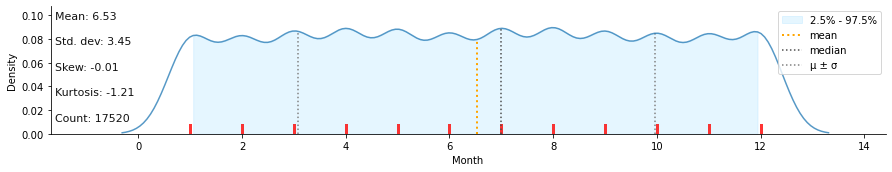

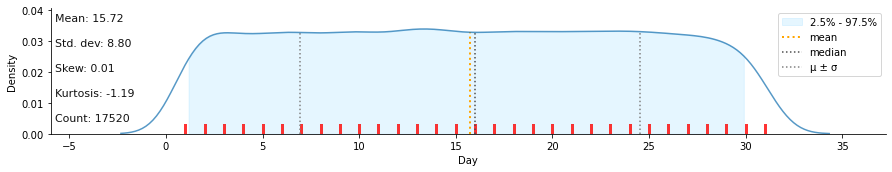

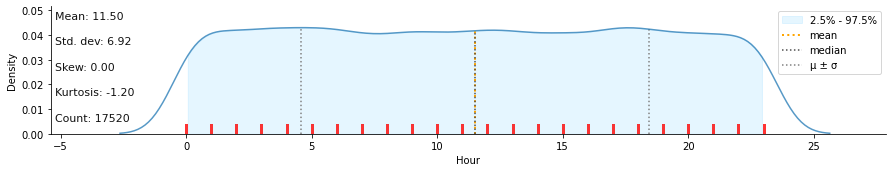

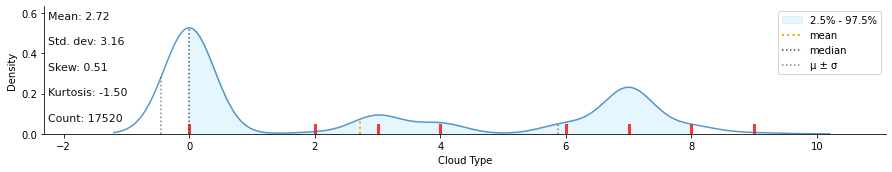

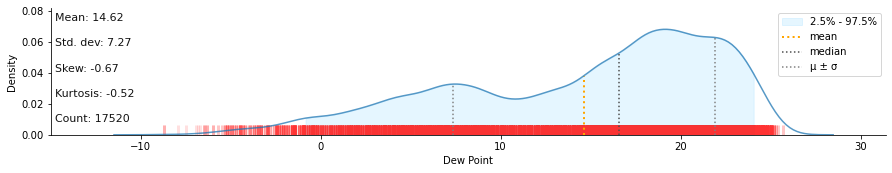

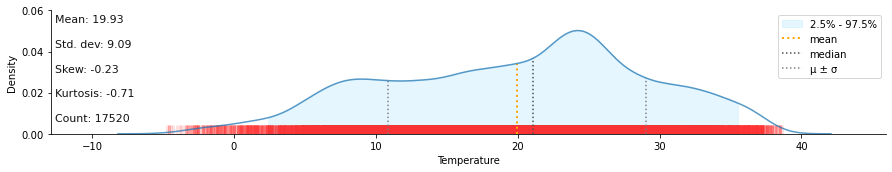

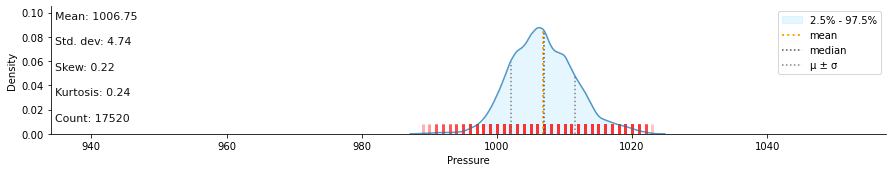

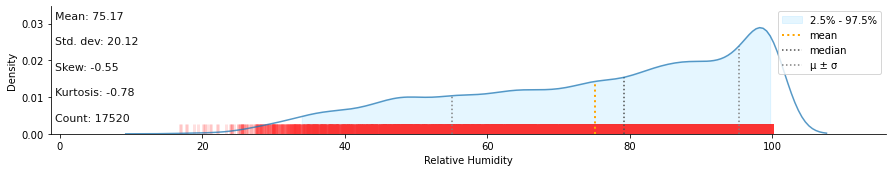

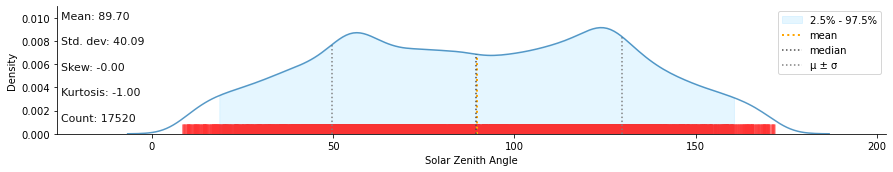

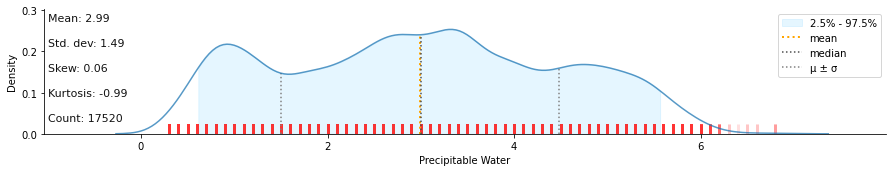

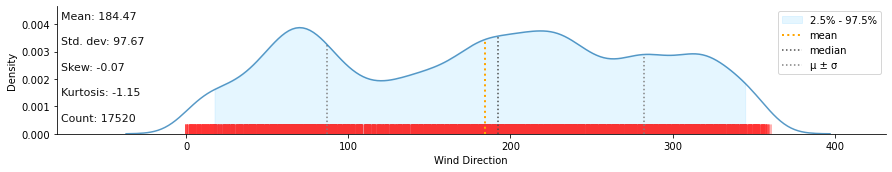

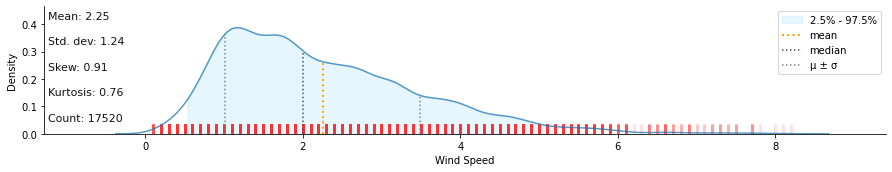

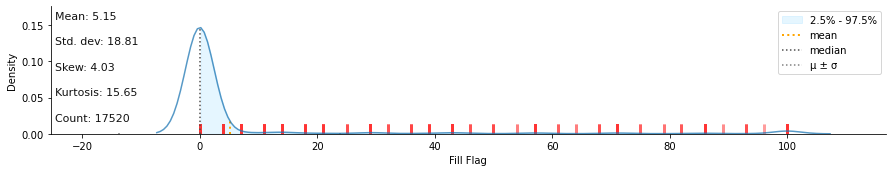

In [136]:
klib.dist_plot(df_test) 

In [137]:
# encoding 
X_test = pd.get_dummies(df_test, columns = ['Cloud Type'])
X_test.head()

,Year,Month,Day,Hour,Minute,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,...,Wind Speed,Fill Flag,Cloud Type_0,Cloud Type_2,Cloud Type_3,Cloud Type_4,Cloud Type_6,Cloud Type_7,Cloud Type_8,Cloud Type_9
0,2019,1,1,0,0,18.4,18.8,1008,97.70,106.23,...,2.3,0,0,0,0,0,0,1,0,0
1,2019,1,1,0,30,18.4,18.6,1008,98.92,112.36,...,2.5,0,0,0,1,0,0,0,0,0
2,2019,1,1,1,0,18.2,18.5,1008,98.35,118.58,...,2.8,0,0,0,1,0,0,0,0,0
3,2019,1,1,1,30,18.2,18.3,1008,99.58,124.86,...,3.0,0,0,0,1,0,0,0,0,0
4,2019,1,1,2,0,18.0,18.0,1008,99.71,131.20,...,3.1,0,1,0,0,0,0,0,0,0


In [138]:
# Scaling 
X_test_copy = X_test.copy(deep=True)

X_test_std = sc.transform(X_test)
X_test_std = pd.DataFrame(X_test_std,columns = X_test_copy.columns)

X_test_std.head()

,Year,Month,Day,Hour,Minute,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,...,Wind Speed,Fill Flag,Cloud Type_0,Cloud Type_2,Cloud Type_3,Cloud Type_4,Cloud Type_6,Cloud Type_7,Cloud Type_8,Cloud Type_9
0,1.941548,-1.611592,-1.676838,-1.647408,-1.000686,0.591227,0.060675,0.824585,0.927724,0.396250,...,0.074741,-0.203011,-0.954716,-0.130586,-0.318758,-0.264865,-0.21288,2.579184,-0.29725,-0.047064
1,1.941548,-1.611592,-1.676838,-1.647408,0.999314,0.591227,0.038247,0.824585,0.990207,0.549371,...,0.242115,-0.203011,-0.954716,-0.130586,3.137174,-0.264865,-0.21288,-0.387719,-0.29725,-0.047064
2,1.941548,-1.611592,-1.676838,-1.502855,-1.000686,0.566560,0.027033,0.824585,0.961014,0.704741,...,0.493176,-0.203011,-0.954716,-0.130586,3.137174,-0.264865,-0.21288,-0.387719,-0.29725,-0.047064
3,1.941548,-1.611592,-1.676838,-1.502855,0.999314,0.566560,0.004606,0.824585,1.024010,0.861610,...,0.660550,-0.203011,-0.954716,-0.130586,3.137174,-0.264865,-0.21288,-0.387719,-0.29725,-0.047064
4,1.941548,-1.611592,-1.676838,-1.358301,-1.000686,0.541892,-0.029035,0.824585,1.030668,1.019977,...,0.744237,-0.203011,1.047432,-0.130586,-0.318758,-0.264865,-0.21288,-0.387719,-0.29725,-0.047064


## Training Models

In [139]:
# Auto ML:

from flaml import AutoML
automl1 = AutoML()
automl_settings = {
    "time_budget": 60,  # in seconds
    "metric": 'mse',
    "task": 'regression'
}

automl1.fit(X_train=X_train_std, y_train=y['Clearsky DHI'], **automl_settings)
# Predict
print(automl1.predict(X_test_std))
# Export the best model
print(automl1.model)

pred1 = automl1.predict(X_test_std).astype('int32')

[flaml.automl: 01-28 14:59:45] {2007} INFO - task = regression
[flaml.automl: 01-28 14:59:45] {2009} INFO - Data split method: uniform
[flaml.automl: 01-28 14:59:45] {2013} INFO - Evaluation method: holdout
[flaml.automl: 01-28 14:59:45] {2113} INFO - Minimizing error metric: mse
[flaml.automl: 01-28 14:59:45] {2170} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl: 01-28 14:59:45] {2437} INFO - iteration 0, current learner lgbm
[flaml.automl: 01-28 14:59:45] {2550} INFO - Estimated sufficient time budget=6577s. Estimated necessary time budget=56s.
[flaml.automl: 01-28 14:59:45] {2597} INFO -  at 0.5s,	estimator lgbm's best error=1092.7135,	best estimator lgbm's best error=1092.7135
[flaml.automl: 01-28 14:59:45] {2437} INFO - iteration 1, current learner lgbm
[flaml.automl: 01-28 14:59:45] {2597} INFO -  at 0.6s,	estimator lgbm's best error=1092.7135,	best estimator lgbm's best error=1092.7135
[flaml.automl: 

[flaml.automl: 01-28 14:59:48] {2437} INFO - iteration 35, current learner rf
[flaml.automl: 01-28 14:59:48] {2597} INFO -  at 3.9s,	estimator rf's best error=232.5219,	best estimator lgbm's best error=170.7415
[flaml.automl: 01-28 14:59:48] {2437} INFO - iteration 36, current learner xgboost
[flaml.automl: 01-28 14:59:48] {2597} INFO -  at 4.0s,	estimator xgboost's best error=214.7665,	best estimator lgbm's best error=170.7415
[flaml.automl: 01-28 14:59:48] {2437} INFO - iteration 37, current learner xgboost
[flaml.automl: 01-28 14:59:48] {2597} INFO -  at 4.0s,	estimator xgboost's best error=214.7665,	best estimator lgbm's best error=170.7415
[flaml.automl: 01-28 14:59:48] {2437} INFO - iteration 38, current learner xgboost
[flaml.automl: 01-28 14:59:48] {2597} INFO -  at 4.0s,	estimator xgboost's best error=214.7665,	best estimator lgbm's best error=170.7415
[flaml.automl: 01-28 14:59:48] {2437} INFO - iteration 39, current learner rf
[flaml.automl: 01-28 14:59:48] {2597} INFO -  at

[flaml.automl: 01-28 15:00:06] {2437} INFO - iteration 72, current learner xgboost
[flaml.automl: 01-28 15:00:06] {2597} INFO -  at 22.1s,	estimator xgboost's best error=155.2384,	best estimator lgbm's best error=91.8965
[flaml.automl: 01-28 15:00:06] {2437} INFO - iteration 73, current learner rf
[flaml.automl: 01-28 15:00:07] {2597} INFO -  at 22.3s,	estimator rf's best error=199.1430,	best estimator lgbm's best error=91.8965
[flaml.automl: 01-28 15:00:07] {2437} INFO - iteration 74, current learner xgb_limitdepth
[flaml.automl: 01-28 15:00:07] {2597} INFO -  at 22.9s,	estimator xgb_limitdepth's best error=185.3342,	best estimator lgbm's best error=91.8965
[flaml.automl: 01-28 15:00:07] {2437} INFO - iteration 75, current learner catboost
[flaml.automl: 01-28 15:00:17] {2597} INFO -  at 32.9s,	estimator catboost's best error=125.5132,	best estimator lgbm's best error=91.8965
[flaml.automl: 01-28 15:00:17] {2437} INFO - iteration 76, current learner xgb_limitdepth
[flaml.automl: 01-28

[40.45287  65.64114  65.7338   ... 14.866982 49.090668 49.037468]


In [140]:
# Auto ML:

from flaml import AutoML
automl2 = AutoML()
automl_settings = {
    "time_budget": 60,  # in seconds
    "metric": 'mse',
    "task": 'regression'
}

automl2.fit(X_train=X_train_std, y_train=y['Clearsky DNI'], **automl_settings)
# Predict
print(automl2.predict(X_test_std))
# Export the best model
print(automl2.model)

pred2 = automl2.predict(X_test_std).astype('int32')

[flaml.automl: 01-28 15:00:50] {2007} INFO - task = regression
[flaml.automl: 01-28 15:00:50] {2009} INFO - Data split method: uniform
[flaml.automl: 01-28 15:00:50] {2013} INFO - Evaluation method: holdout
[flaml.automl: 01-28 15:00:50] {2113} INFO - Minimizing error metric: mse
[flaml.automl: 01-28 15:00:50] {2170} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl: 01-28 15:00:50] {2437} INFO - iteration 0, current learner lgbm
[flaml.automl: 01-28 15:00:50] {2550} INFO - Estimated sufficient time budget=4704s. Estimated necessary time budget=40s.
[flaml.automl: 01-28 15:00:50] {2597} INFO -  at 0.6s,	estimator lgbm's best error=30605.8622,	best estimator lgbm's best error=30605.8622
[flaml.automl: 01-28 15:00:50] {2437} INFO - iteration 1, current learner lgbm
[flaml.automl: 01-28 15:00:50] {2597} INFO -  at 0.6s,	estimator lgbm's best error=30605.8622,	best estimator lgbm's best error=30605.8622
[flaml.auto

[flaml.automl: 01-28 15:00:53] {2437} INFO - iteration 35, current learner rf
[flaml.automl: 01-28 15:00:53] {2597} INFO -  at 3.4s,	estimator rf's best error=1844.3255,	best estimator lgbm's best error=1401.3853
[flaml.automl: 01-28 15:00:53] {2437} INFO - iteration 36, current learner catboost
[flaml.automl: 01-28 15:00:55] {2597} INFO -  at 5.2s,	estimator catboost's best error=1365.7902,	best estimator catboost's best error=1365.7902
[flaml.automl: 01-28 15:00:55] {2437} INFO - iteration 37, current learner extra_tree
[flaml.automl: 01-28 15:00:55] {2597} INFO -  at 5.3s,	estimator extra_tree's best error=1959.2545,	best estimator catboost's best error=1365.7902
[flaml.automl: 01-28 15:00:55] {2437} INFO - iteration 38, current learner rf
[flaml.automl: 01-28 15:00:55] {2597} INFO -  at 5.4s,	estimator rf's best error=1844.3255,	best estimator catboost's best error=1365.7902
[flaml.automl: 01-28 15:00:55] {2437} INFO - iteration 39, current learner xgboost
[flaml.automl: 01-28 15:0

[flaml.automl: 01-28 15:01:26] {2437} INFO - iteration 72, current learner extra_tree
[flaml.automl: 01-28 15:01:29] {2597} INFO -  at 39.0s,	estimator extra_tree's best error=1718.3464,	best estimator lgbm's best error=418.0317
[flaml.automl: 01-28 15:01:29] {2437} INFO - iteration 73, current learner xgboost
[flaml.automl: 01-28 15:01:29] {2597} INFO -  at 39.3s,	estimator xgboost's best error=1357.2580,	best estimator lgbm's best error=418.0317
[flaml.automl: 01-28 15:01:29] {2437} INFO - iteration 74, current learner xgb_limitdepth
[flaml.automl: 01-28 15:01:29] {2597} INFO -  at 39.9s,	estimator xgb_limitdepth's best error=1570.9248,	best estimator lgbm's best error=418.0317
[flaml.automl: 01-28 15:01:29] {2437} INFO - iteration 75, current learner xgboost
[flaml.automl: 01-28 15:01:30] {2597} INFO -  at 40.1s,	estimator xgboost's best error=1357.2580,	best estimator lgbm's best error=418.0317
[flaml.automl: 01-28 15:01:30] {2437} INFO - iteration 76, current learner xgb_limitdept

[225.27322735 378.34116417 378.74133123 ... 169.85395926 363.14060586
 360.4343044 ]


In [141]:
# Auto ML:

from flaml import AutoML
automl3 = AutoML()
automl_settings = {
    "time_budget": 60,  # in seconds
    "metric": 'mse',
    "task": 'regression'
}

automl3.fit(X_train=X_train_std, y_train=y['Clearsky GHI'], **automl_settings)
# Predict
print(automl3.predict(X_test_std))
# Export the best model
print(automl3.model)

pred3 = automl3.predict(X_test_std).astype('int32')

[flaml.automl: 01-28 15:01:57] {2007} INFO - task = regression
[flaml.automl: 01-28 15:01:57] {2009} INFO - Data split method: uniform
[flaml.automl: 01-28 15:01:57] {2013} INFO - Evaluation method: holdout
[flaml.automl: 01-28 15:01:57] {2113} INFO - Minimizing error metric: mse
[flaml.automl: 01-28 15:01:57] {2170} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl: 01-28 15:01:57] {2437} INFO - iteration 0, current learner lgbm
[flaml.automl: 01-28 15:01:57] {2550} INFO - Estimated sufficient time budget=3867s. Estimated necessary time budget=33s.
[flaml.automl: 01-28 15:01:57] {2597} INFO -  at 0.6s,	estimator lgbm's best error=29473.2940,	best estimator lgbm's best error=29473.2940
[flaml.automl: 01-28 15:01:57] {2437} INFO - iteration 1, current learner lgbm
[flaml.automl: 01-28 15:01:57] {2597} INFO -  at 0.6s,	estimator lgbm's best error=29473.2940,	best estimator lgbm's best error=29473.2940
[flaml.auto

[flaml.automl: 01-28 15:01:59] {2597} INFO -  at 3.2s,	estimator xgboost's best error=1006.8089,	best estimator lgbm's best error=109.6659
[flaml.automl: 01-28 15:01:59] {2437} INFO - iteration 36, current learner extra_tree
[flaml.automl: 01-28 15:01:59] {2597} INFO -  at 3.4s,	estimator extra_tree's best error=297.6978,	best estimator lgbm's best error=109.6659
[flaml.automl: 01-28 15:01:59] {2437} INFO - iteration 37, current learner xgboost
[flaml.automl: 01-28 15:02:00] {2597} INFO -  at 3.4s,	estimator xgboost's best error=1006.8089,	best estimator lgbm's best error=109.6659
[flaml.automl: 01-28 15:02:00] {2437} INFO - iteration 38, current learner xgboost
[flaml.automl: 01-28 15:02:00] {2597} INFO -  at 3.5s,	estimator xgboost's best error=1006.8089,	best estimator lgbm's best error=109.6659
[flaml.automl: 01-28 15:02:00] {2437} INFO - iteration 39, current learner rf
[flaml.automl: 01-28 15:02:00] {2597} INFO -  at 3.6s,	estimator rf's best error=95.5958,	best estimator rf's be

[flaml.automl: 01-28 15:02:13] {2597} INFO -  at 16.9s,	estimator xgboost's best error=124.5228,	best estimator lgbm's best error=38.8473
[flaml.automl: 01-28 15:02:13] {2437} INFO - iteration 73, current learner xgboost
[flaml.automl: 01-28 15:02:14] {2597} INFO -  at 18.0s,	estimator xgboost's best error=124.0973,	best estimator lgbm's best error=38.8473
[flaml.automl: 01-28 15:02:14] {2437} INFO - iteration 74, current learner xgb_limitdepth
[flaml.automl: 01-28 15:02:15] {2597} INFO -  at 18.6s,	estimator xgb_limitdepth's best error=167.1991,	best estimator lgbm's best error=38.8473
[flaml.automl: 01-28 15:02:15] {2437} INFO - iteration 75, current learner extra_tree
[flaml.automl: 01-28 15:02:15] {2597} INFO -  at 18.7s,	estimator extra_tree's best error=222.8274,	best estimator lgbm's best error=38.8473
[flaml.automl: 01-28 15:02:15] {2437} INFO - iteration 76, current learner extra_tree
[flaml.automl: 01-28 15:02:15] {2597} INFO -  at 18.8s,	estimator extra_tree's best error=222

[172.65500695 302.72464176 302.75088635 ...  28.37576198 265.89381217
 266.50971529]


## Submission

In [142]:
df_test['Clearsky DHI'] = pred1
df_test['Clearsky DNI'] = pred2
df_test['Clearsky GHI'] = pred3

In [143]:
df_test['Clearsky DHI'].value_counts()

51     1801
50     1780
39     1405
40      666
65      489
       ... 
204       1
207       1
192       1
197       1
189       1
Name: Clearsky DHI, Length: 211, dtype: int64

In [144]:
df_test['Clearsky DNI'].value_counts()

358     2691
226     1146
225      655
357      612
359      526
        ... 
420        1
1002       1
237        1
293        1
188        1
Name: Clearsky DNI, Length: 1015, dtype: int64

In [145]:
df_test['Clearsky GHI'].value_counts()

 269     2580
 174     1186
 268     1017
 173      905
 304      293
         ... 
 1019       1
-67         1
-26         1
-56         1
-42         1
Name: Clearsky GHI, Length: 1056, dtype: int64

In [146]:
submission = df_test[['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI']]
submission.to_csv('submission.csv', index=False)